In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
df=pd.read_csv("LED Bulb.csv")

In [2]:
df.head()

,ProductId,Defect,Assembly Line
0,P116731,0,2
1,P435720,1,1
2,P113177,0,2
3,P488442,0,1
4,P188067,0,2


In [ ]:
## rows, col


In [3]:
df.shape

(200, 3)

In [ ]:
#### Q2. How many variables are numericals vs categorical?


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductId      200 non-null    object
 1   Defect         200 non-null    int64 
 2   Assembly Line  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


,Defect,Assembly Line
count,200.000000,200.000000
mean,0.080000,1.975000
std,0.271974,0.798475
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,1.000000,3.000000


In [ ]:
#### Observations:
1. Overall 2 variables are int64 type and 1 variable object type.
2. Assemply line is also an ordinal categorical variable along with Product Id as we have limited values in it (cardinality = 3).
3. In the similar manner, Defect is a nominal categorical variable with limited values (cardinality = 2).

In [ ]:
#### Q3. Are there any inconsistencies withi the data? For instance, nulls, duplicates, outliers or garbage values


In [ ]:
duplicate values

In [5]:
df.duplicated().sum()

0

In [ ]:
identy null values

In [6]:
df.isnull().sum()

ProductId        0
Defect           0
Assembly Line    0
dtype: int64

In [ ]:
#### Observations:
1. There are no nulls involved as its evident from info function.
2. There are no duplicates involved in the dataset.
3. There are no garbage values.
4. There are no extremes. Only thing is we have very less defects present within the dataset which makes this defect variable highly imbalanced.

In [ ]:
#### Q4. Perform univariate analysis on the variables

In [27]:
df.Defect.value_counts(normalize=True)

Defect
0    0.92
1    0.08
Name: proportion, dtype: float64

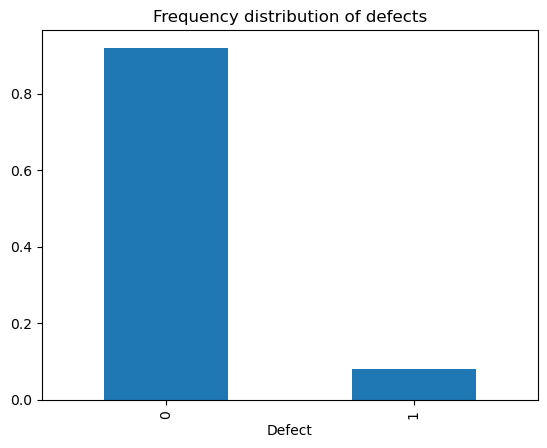

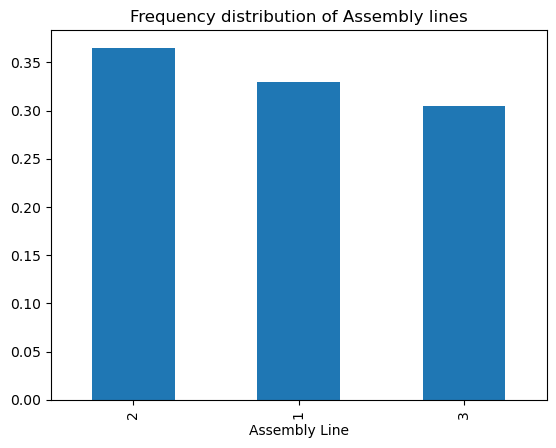

In [8]:
df.Defect.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Frequency distribution of defects')
plt.show()
df['Assembly Line'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Frequency distribution of Assembly lines')
plt.show()

In [ ]:
#### Observations:
1. There are not many observations towards the actual defect values which is actually a good news as the assembly lines are working as expected.
2. We are seeing highest number of observations for assembly line 2 followed by 1 and then 3.

In [ ]:
#### Q5. Perform bivariate analysis on the variables

In [33]:
df.corr()["Defect"]

ValueError: could not convert string to float: 'P116731'

In [ ]:
#### Let's witness the impact of individual assembly Lines

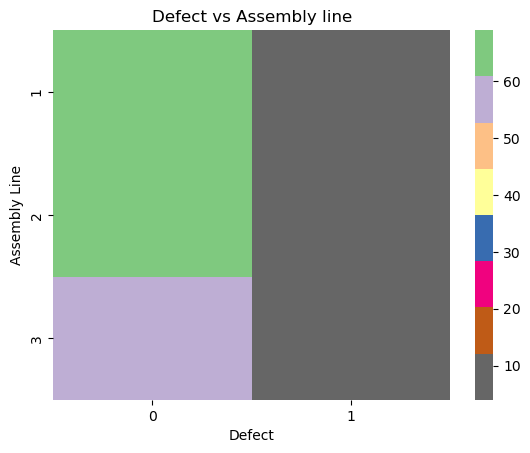

In [12]:
sns.heatmap(pd.crosstab(index = df['Assembly Line'], columns=df.Defect), cmap='Accent_r')
plt.title('Defect vs Assembly line')
plt.show()

In [ ]:
#### Hmm, so we don't see much of a difference in between different assembly lines. Let's try to analyze only the defects.

#### Q6. Determine the probabilities for defects in individual assemble lines and plot it using visualization.

In [25]:
pivot_table = df.pivot_table(values = 'Defect', index = 'Assembly Line', columns = 'Defect', aggfunc = 'count')
pivot_table

Defect,0,1
Assembly Line,,
1,61,5
2,69,4
3,54,7


In [14]:
temp = df.groupby('Assembly Line').agg({'Defect': ['sum', 'count']}).reset_index()
temp.columns = ['Assemble Line', 'Total Defects', 'Total observations']
temp['Proportion'] = temp['Total Defects'] / temp['Total observations']
temp

,Assemble Line,Total Defects,Total observations,Proportion
0,1,5,66,0.075758
1,2,4,73,0.054795
2,3,7,61,0.114754


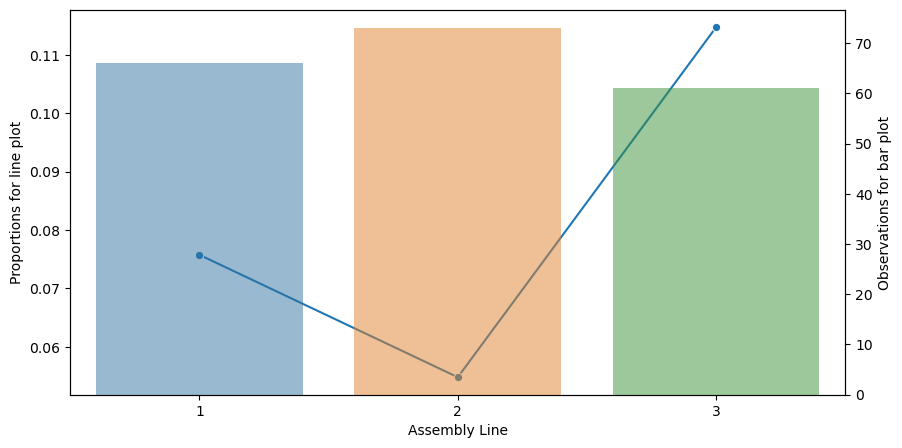

In [15]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,5))

sns.lineplot(data = temp['Proportion'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = temp, x='Assemble Line', y='Total observations', alpha=0.5, ax=ax2)
ax1.set_xlabel('Assembly Line')
ax1.set_ylabel('Proportions for line plot')
ax2.set_ylabel('Observations for bar plot')
plt.show()

In [ ]:
#### Observations:

So, we have highest set of observations of assembly line 2 but highest number of defects are coming for Assemble line 3.

**Probability for Defect in Assemble line 1:** 0.075758

**Probability for Defect in Assemble line 2:** 0.054795

**Probability for Defect in Assemble line 3:** 0.114754

In [ ]:
#### Q7. With the calculated probabilities, let's try to answer following questions for 20 samples drawn at random from different assembly lines.

7.1. Check out the binomial distributions of probabilities from 0 to 20 defects from 20 samples drawn at random from 3 different assembly lines

In [17]:
p1 = 0.075758
n1 = 20

p2 = 0.054795
n2 = 20

p3 = 0.114754
n3 = 20

k = np.arange(0,21)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [18]:
binomial1 = stats.binom.pmf(k,n1,p1)
binomial2 = stats.binom.pmf(k,n2,p2)
binomial3 = stats.binom.pmf(k,n3,p3)

binomial1

array([2.06877854e-01, 3.39146078e-01, 2.64090759e-01, 1.29881488e-01,
       4.52458745e-02, 1.18678423e-02, 2.43194963e-03, 3.98682682e-04,
       5.31035479e-05, 5.80370160e-06, 5.23287741e-07, 3.89933615e-08,
       2.39714740e-09, 1.20916112e-10, 4.95560840e-12, 1.62479949e-13,
       4.16190914e-15, 8.02687437e-17, 1.09657418e-18, 9.46143939e-21,
       3.87766259e-23])

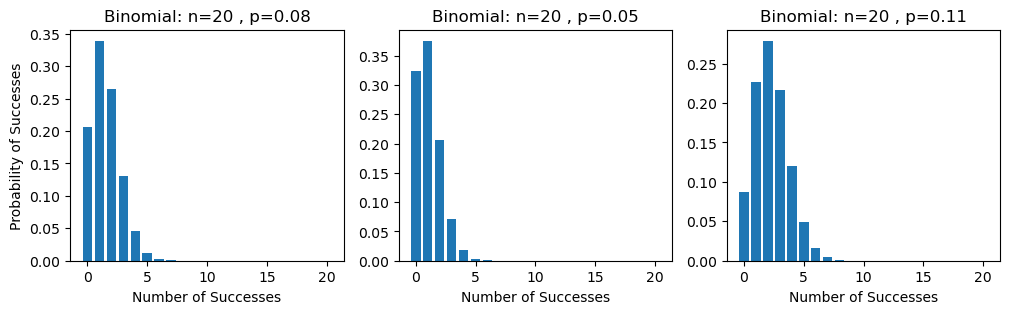

In [19]:
# plot the distribution
_,ax = plt.subplots(ncols=3, figsize=(12,3))

ax[0].bar(k,binomial1)
ax[0].set_title('Binomial: n=%i , p=%.2f' % (n1,p1))
ax[0].set_xlabel('Number of Successes')
ax[0].set_ylabel('Probability of Successes')

ax[1].bar(k,binomial2)
ax[1].set_title('Binomial: n=%i , p=%.2f' % (n2,p2))
ax[1].set_xlabel('Number of Successes')

ax[2].bar(k,binomial3)
ax[2].set_title('Binomial: n=%i , p=%.2f' % (n3,p3))
ax[2].set_xlabel('Number of Successes')
plt.show()

In [ ]:
#### Observations:

1. It's clearly visible that as we move towards the higher set of defect probabilities in assembly line 3, the chances of getting lower set of defects are highest in it followed by assembly line 1 and assembly line 2 respectively.

In [ ]:
**7.2. What is the probability that two or fewer of the LED bulbs are defective for assembly line 1?**

In [20]:
# two or fewer - 0,1,2

# P(0) + P(1) + P(2)
binomial1[0] + binomial1[1] + binomial1[2]

0.8101146907434262

In [21]:
cumulative_binomial = stats.binom.cdf(k,n1,p1)
print(cumulative_binomial[2])

0.8101146907434262


In [ ]:
**7.3. What is the probability that at least 3 of the LED bulbs are defective for assembly line 1?**

In [22]:
print(1 - cumulative_binomial[2])

0.18988530925657376


In [ ]:
**7.4 Which number of success witness the highest chances of occurrence in assembly line 3?**

In [23]:
print(f'Number of success witness the highest chances of occurrence in assembly line 3: {np.argmax(binomial1)}')

Number of success witness the highest chances of occurrence in assembly line 3: 1


In [24]:
binomial3

array([8.73533292e-02, 2.26471375e-01, 2.78895034e-01, 2.16918150e-01,
       1.19505717e-01, 4.95726938e-02, 1.60652093e-02, 4.16505023e-03,
       8.77359268e-04, 1.51642196e-04, 2.16230329e-05, 2.54816639e-06,
       2.47738160e-07, 1.97625691e-08, 1.28090602e-09, 6.64172847e-11,
       2.69051240e-12, 8.20634795e-14, 1.77297469e-15, 2.41926137e-17,
       1.56803826e-19])